**Bike Sharing**

# **I. Business Understanding** 




## **1.1 Context** 

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.
Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in a city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.

## **1.2 Problem Statement** 

Bike cycling has emerged as a considerable alternative to engine-powered transportation such as buses, cars, motorbikes, and metros. Not only bike cycling contributes to environmental sustainability but also improves users' health and mobility. However, despite its benefits, biking awareness remains relatively low compared to other modes of transport. This analysis aims to predict bike-sharing use while exposing its potential across the city. Recognizing the city's increasing efforts to promote alternative transportation as part of the green movement, this Analysis also examines how business models can enhance commuting efficiency.

Through an analysis of bike-sharing data, this Analysis seeks to unveil use patterns and identify areas for service improvement by means of meaningful trends and develop a predictive model for bike rentals.



## **1.3 Goals**

Regression modelling can be a regular approach to indicate bike-sharing trends based on the transportation use variables. This analysis will estimate which model is to be properly fit to predict pivotal bike-sharing variables for our machine learning. 


## **1.4 Analytical Approach** 

1. Explanatory Data Analysis on the dateaset.
2. Initiate any required Feature Engineering. 
3. Dataset Preprocessing.
4. Benchmarking on types of regression model.  
5. Initiate Hyperparameter Tuning on the selected model for results with lower risk. 

# **II. Data**

## **2.1 Data Understanding**

In [2]:
#importing libraries for analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
#from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings ('ignore')

In [3]:
#impporting Bike Sharing Dataset  
df = pd.read_csv('/Users/katedethan/Documents/Data Science & Machine Learning Class/Exam Module 3/data_bike_sharing.csv')
df.head(5)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


The dataset presents the following variables: 

| Features                        | Description                                                      |
|-------------------------------|------------------------------------------------------------------|
| dteday                     | date                  |
| hum                      | normalized humidity. The values are divided into 100 (max)                                      |
| weathersit                           | (1): Clear, Few clouds, Partly cloudy, Partly cloudy (2): Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (3): Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (4): Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    |
| holiday                  | holiday or not                       |
| season                      | season (1: winter, 2: spring, 3: summer, 4: fall)                           |
| atemp                       | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)                                   |
| temp                      | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)                       |
| hr                       | hour (0 to 23)                               |
| casual              | count of casual users                   |
| registered              | count of registered users                   |
| cnt              | count of total rental bikes including both casual and registered                   |

In connection with the goals of this Analysis, we can take preliminary insight as to the number of casual users and registered users are of much different whereby casual users represent a few percentage compared to registered users. This leaves assumption that not every registered bike user regularly uses bike rental. 

In [4]:
df.dtypes

dteday         object
hum           float64
weathersit      int64
holiday         int64
season          int64
atemp         float64
temp          float64
hr              int64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# Identifying statistical information on the dataset
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [6]:
print ('Total of (Rows, Columns): ', df.shape)

Total of (Rows, Columns):  (12165, 11)


The dataset has total of 11 columns and 12.165 rows of which most fall into qualitative data. The integers variables are divided into types of discreet and continue quantitative data as follows: 

**Continue Qualitative Data** 
1. temp 
2. hum 
3. atemp 


**Discreet Qualitative data** 
1. weathersit
2. holiday 
3. season 
4. hr 
5. casual 
6. registered 
7. cnt 

The description table above shows that all columns retain same amount total value of 12.165 as supported with the information description as below, leaving impression there is no discrepancy as to the data amount or missing value in each column. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


For clarity purposes, we will rename some columns with proper assignment as below: 

In [8]:
# Rename some columns
print(df.columns)
df = df.rename(columns={'dteday':'date',
                        'hum':'humidity',
                        'weathersit':'weather',
                        'cnt':'count',
                        'temp':'temperature', 
                        'atempt' : 'feeling temperature',
                        'hr' : 'hour'
                        })

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')


In [9]:
df.head()

,date,humidity,weather,holiday,season,atemp,temperature,hour,casual,registered,count
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **2.1.1 Identifying Missing Values**

In [10]:
df.isnull().sum()

date           0
humidity       0
weather        0
holiday        0
season         0
atemp          0
temperature    0
hour           0
casual         0
registered     0
count          0
dtype: int64

Supporting the foregoing, the dataset has no missing variables. Nonetheless, we will take a look if there is any variables using symbols or signs as potential missing values. 

In [11]:
#Identiying any data using symbols or sign as missing values 
feature = []
n_data = []
n_feature = []
s_feature = []

for i in df.columns:
    feature.append(i)
    n_data.append(df[i].count())
    n_feature.append(df[i].nunique())
    s_feature.append(list(df[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Data" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = df.columns)


,Number of Data,Number of Types,Samples of Types
date,12165,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13]"
humidity,12165,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0]"
weather,12165,4,"[1, 2, 3, 4]"
holiday,12165,2,"[0, 1]"
season,12165,4,"[4, 2, 3, 1]"
atemp,12165,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394]"
temperature,12165,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66]"
hour,12165,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5]"
casual,12165,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219]"
registered,12165,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5]"


In [12]:
#missing value percentage
mv_prcntg = df.isna().sum()/df.shape[0]*100
print(round(mv_prcntg,2))

date           0.0
humidity       0.0
weather        0.0
holiday        0.0
season         0.0
atemp          0.0
temperature    0.0
hour           0.0
casual         0.0
registered     0.0
count          0.0
dtype: float64


It is found there is no missing value in the dataset, including whose variables use any symbols or signs. We have also taken into account the missing value percentage shows 0 (zero) amount. 

### **2.1.2 Duplicated Data** 

In [13]:
df.duplicated().sum()

np.int64(0)

Since there is no duplication of data and missing value in dataset, we are not required to take any action for missing values and therefore can proceed with identifying outliers. Noting that the data is clean from any missing values or duplicates, we want to make sure any outliers that may affect our model training, especially those with extreme values. 

### **2.1.3 Identifying Outliers**

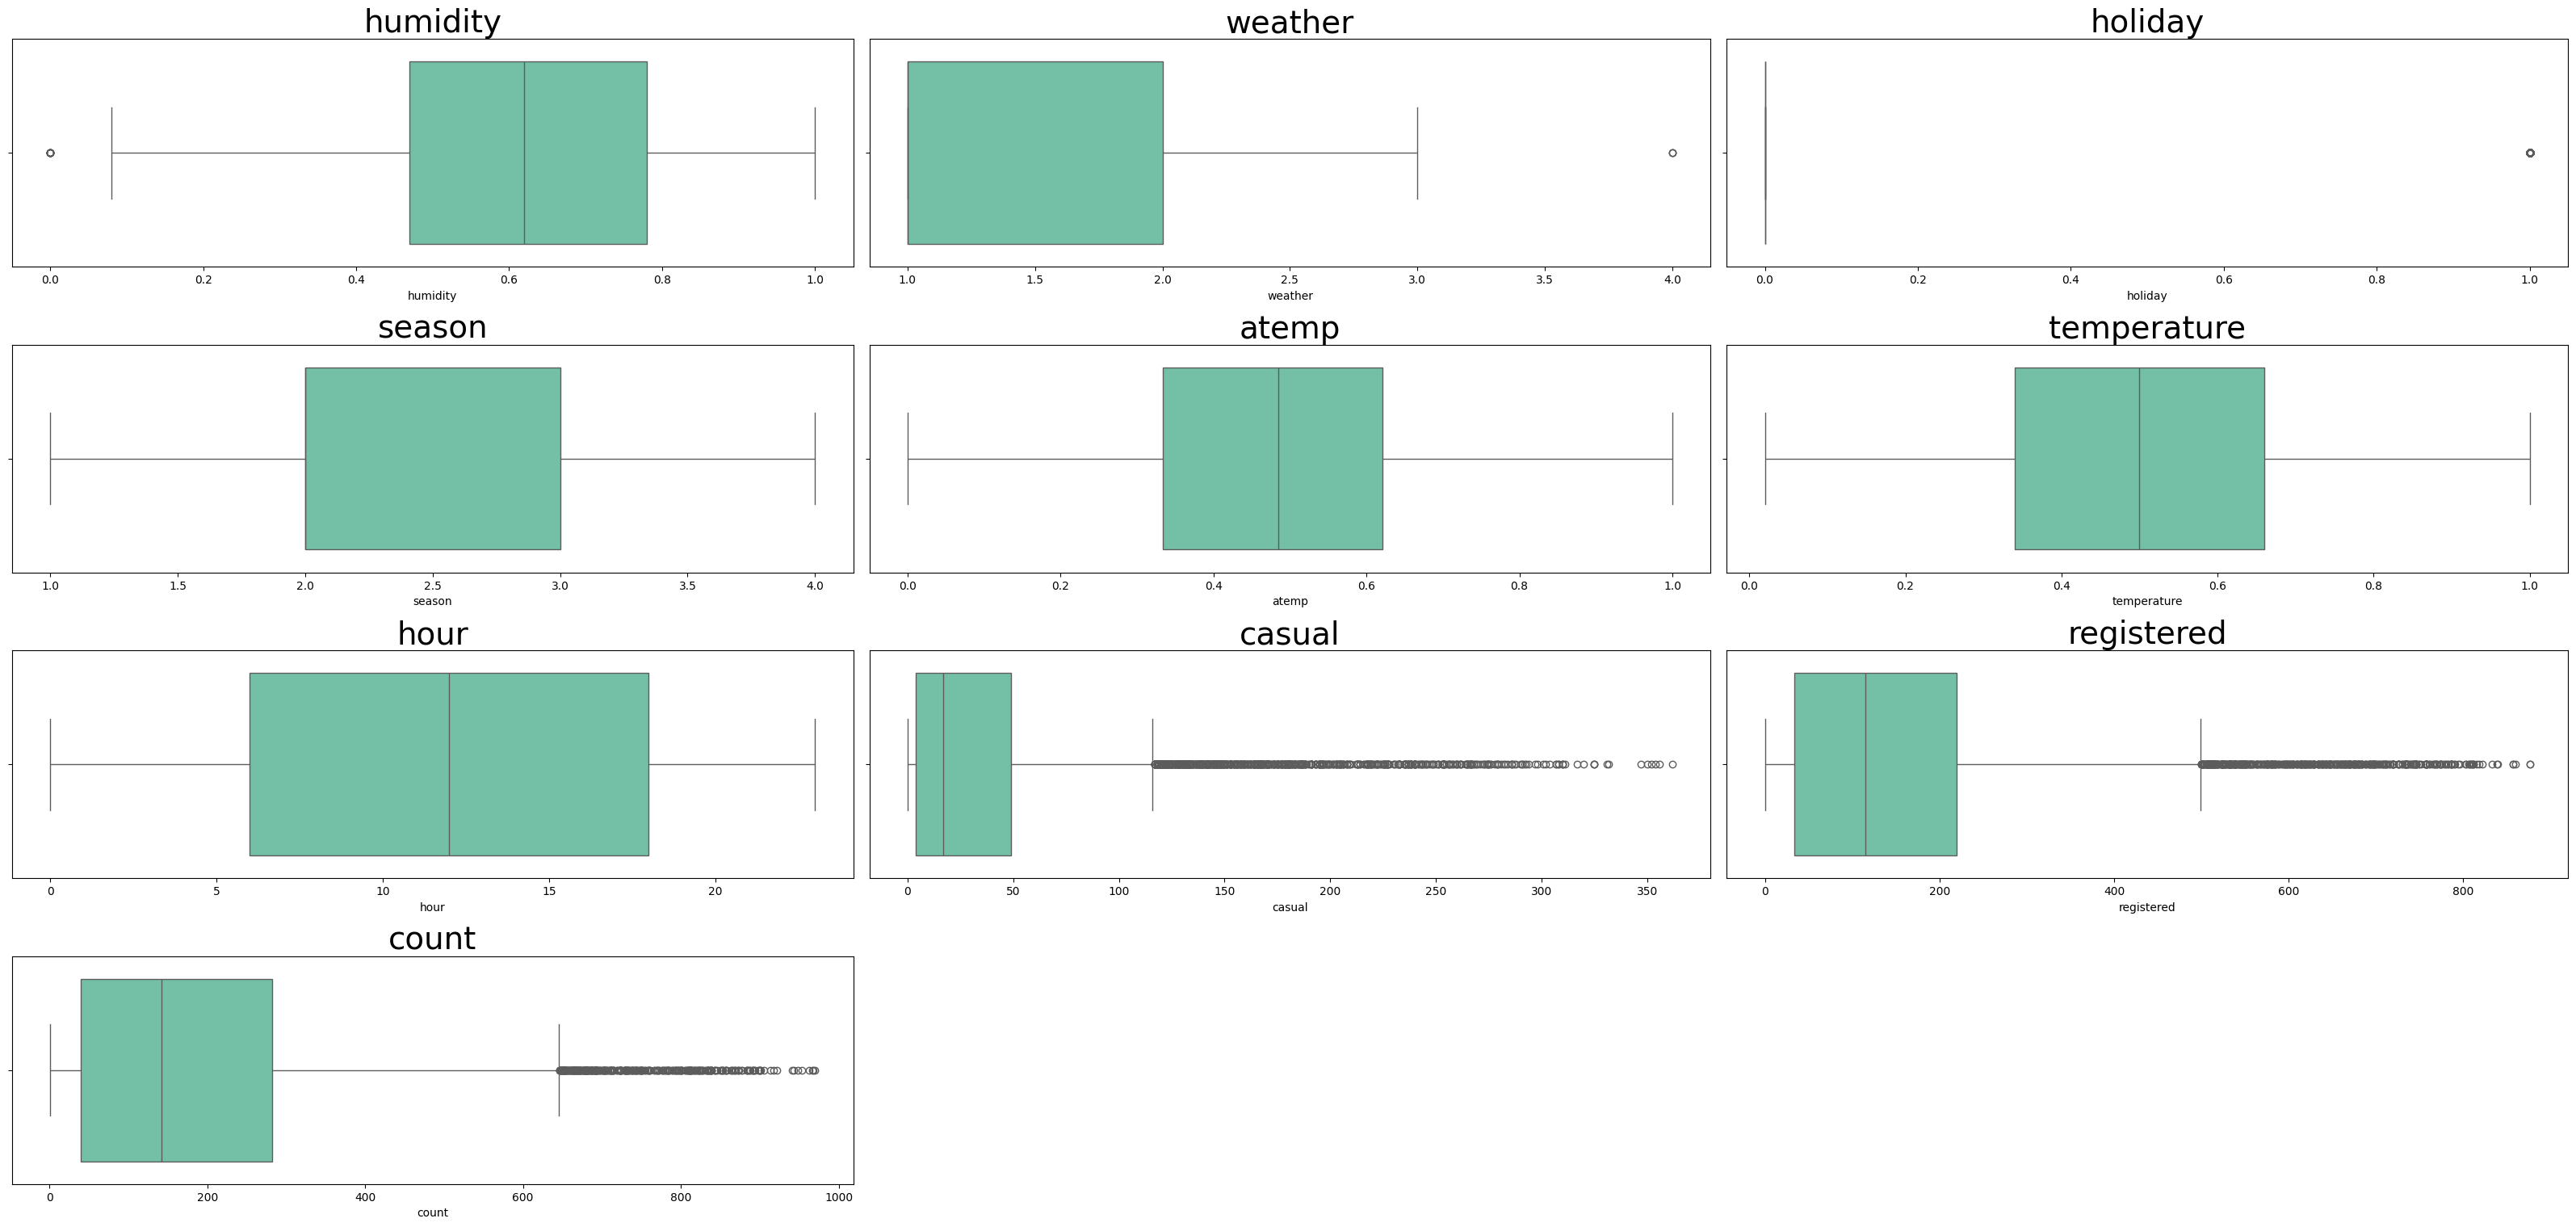

In [14]:
plt.figure(figsize=(32,30))
plotnumber = 1

for col in (x for x in df.describe().columns):
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(x=col,data=df, color='#66cdaa')
    plt.title(col,fontsize=28)
    plt.tight_layout()
    plotnumber+=1

plt.show()

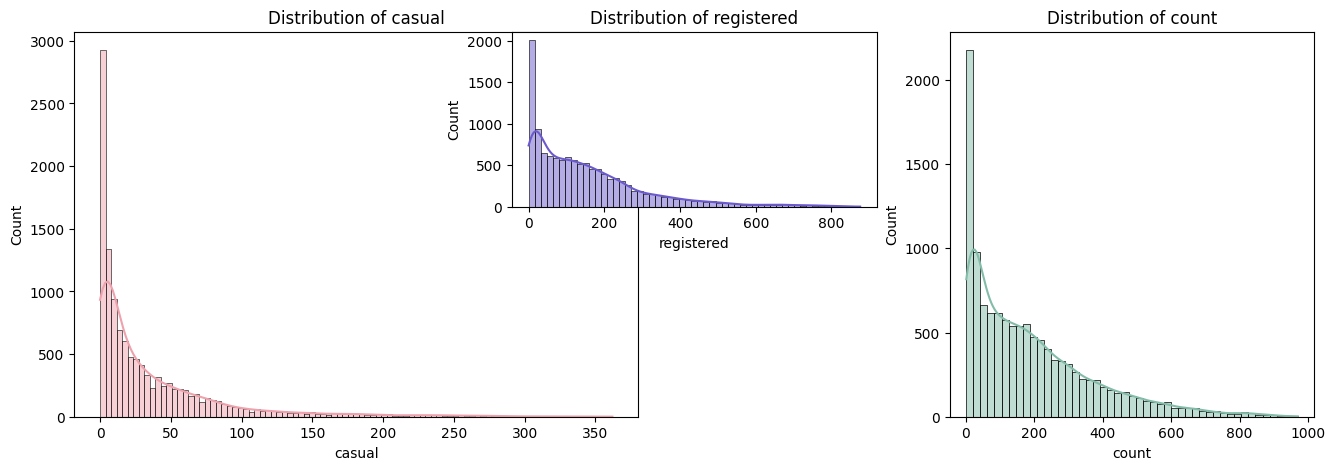

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Distribution of casual',fontsize=12)
sns.histplot(df['casual'], kde=True, color='#eea2ad')


plt.subplot(2,3,2)
plt.title('Distribution of registered',fontsize=12)
sns.histplot(df['registered'], kde=True, color='slateblue')


plt.subplot(1,3,3)
plt.title('Distribution of count',fontsize=12)
sns.histplot(df['count'], kde=True, color='#83bca9')

plt.show()

The Boxplot indicates there are massive outiers in 'casual', 'registered' and 'count' until the bar supports the distribution of these variables incline its skewness to right. 

### **2.1.4 Handling Outliers**

We choose hist-plot with kernel density as a true graph for both casual, registered and count columns so that we can understand among them, which one has normal distribution. Apparently the histograms reveal that the three columns have tendency right-skewed. Hence, we will take further analysis on skewness coefficient test to ensure the normality of both columns.

In [16]:
from scipy.stats import skew
df[['casual', 'registered', 'count']].skew()

casual        2.476743
registered    1.550608
count         1.267723
dtype: float64

Reducing the impact of outliers by means of log transformation.  

In [17]:
df['casual tr'] = np.log1p(df[['casual']])
#casual 
lower_casual = df['casual'].quantile(0.01)
upper_casual = df['casual'].quantile(0.99)
df['casual'] = np.clip(df['casual'], lower_casual, upper_casual)
skewness = skew(df['casual tr'])
print(f"Casual Skewness after transformation: {skewness}")


#registered
df['registered tr'] = np.log1p(df['registered']) 
lower_rgs = df['registered'].quantile(0.01)
upper_rgs = df['registered'].quantile(0.99)
df['registered'] = np.clip(df['registered'], lower_rgs, upper_rgs)
skewness = skew(df['registered tr'])
print(f"Registered Skewness after transformation: {skewness}")

#count
df['count tr'] = np.log1p(df['count']) 
lower_count = df['count'].quantile(0.01)
upper_count = df['count'].quantile(0.99)
df['count'] = np.clip(df['count'], lower_count, upper_count)
skewness = skew(df['count tr'])
print(f"Count Skewness after transformation: {skewness}")

Casual Skewness after transformation: -0.23088143800597075
Registered Skewness after transformation: -0.8048042886657857
Count Skewness after transformation: -0.805273740421596


In [18]:
df[['casual tr', 'registered tr', 'count tr']].skew()

casual tr       -0.230910
registered tr   -0.804904
count tr        -0.805373
dtype: float64

The CPGA test shows that the data is **highly skewed** since the result appears more than 1.2. Then, we take another Kolmogorov-Smirnov test to ensure the skewness coefficient remains aligned on its basis. We are using Kolmogorov-Smirnov test because the dataset tends to appear relatively large and the test is more practical to normality testing generally. 

In [19]:
from scipy.stats import kstest, norm
import random

data_q=df[['casual tr', 'registered tr', 'count tr']]

np.random.seed(42)
sample_size = 10000
mean = 0
std_dev = 1
sample = np.random.normal(mean, std_dev, sample_size)
 
def empirical_distribution_function(x, data_q):
    return np.sum(data_q <= x) / len(data_q)
edf_values = [empirical_distribution_function(x, sample) for x in sample]
 
reference_cdf = norm.cdf(sample)

ks_statistic, ks_p_value = kstest(sample, 'norm')
alpha = 0.05

 
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
 
if ks_p_value < alpha:
    print("Reject the null hypothesis. The sample does not come from the specified distribution.")
else:
    print("Fail to reject the null hypothesis. The sample comes from the specified distribution.")

Kolmogorov-Smirnov Statistic: 0.003674476700887941
P-value: 0.9992074462469855
Fail to reject the null hypothesis. The sample comes from the specified distribution.


In [20]:
df_bike = df.copy()

Some columns of 'humidity', 'weather', 'holiday', 'casual', 'registered' and 'count' are shown with outliers. However, a couple variables such as 'weather' and 'holiday' might not need any action to resolve outliers they (the outliers) relatively represent unique values. 

### **2.1.3 Unique Value Description** 

In [87]:
#identify unique values 
list_item = []
for col in df.columns:
  list_item.append([col, df[col].nunique(), df[col].unique()])

table_uv = pd.DataFrame(columns=['Column Name', 'Sum of UV', 'Unique Data'], data=list_item)

In [22]:
pd.set_option('display.max_colwidth', 0)
table_uv

,Column Name,Sum of UV,Unique Data
0,date,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,humidity,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weather,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temperature,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hour,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,238,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 242, 81, 80, 220, 46, 36, 14, 3, 48, 31, 32, 72, 26, 21, 142, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 148, 43, 4, 138, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 42, 89, 77, 40, 59, ...]"
9,registered,662,"[226, 16, 90, 126, 696, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, 25, ...]"


the column date has:  date
2011-08-09    22
2011-02-01    22
2012-03-02    22
2012-09-29    22
2011-05-26    22
              ..
2011-10-26    9 
2012-10-30    8 
2011-01-27    7 
2011-01-18    6 
2012-10-29    1 
Name: count, Length: 731, dtype: int64
the column humidity has:  humidity
0.88    450
0.83    439
0.94    383
0.87    329
0.70    302
       ... 
0.13    1  
0.97    1  
0.91    1  
0.12    1  
0.14    1  
Name: count, Length: 89, dtype: int64
the column holiday has:  holiday
0    11803
1    362  
Name: count, dtype: int64
the column temperature has:  temperature
0.70    507
0.60    492
0.62    491
0.66    485
0.64    476
0.34    463
0.30    445
0.36    437
0.32    428
0.40    424
0.54    414
0.46    409
0.72    404
0.56    391
0.26    391
0.52    388
0.42    373
0.50    369
0.74    368
0.24    367
0.44    358
0.22    298
0.76    281
0.38    262
0.20    242
0.68    242
0.80    236
0.28    223
0.48    198
0.58    197
0.82    160
0.16    153
0.78    126
0.18    117
0.14    99 


<Figure size 1000x1000 with 0 Axes>

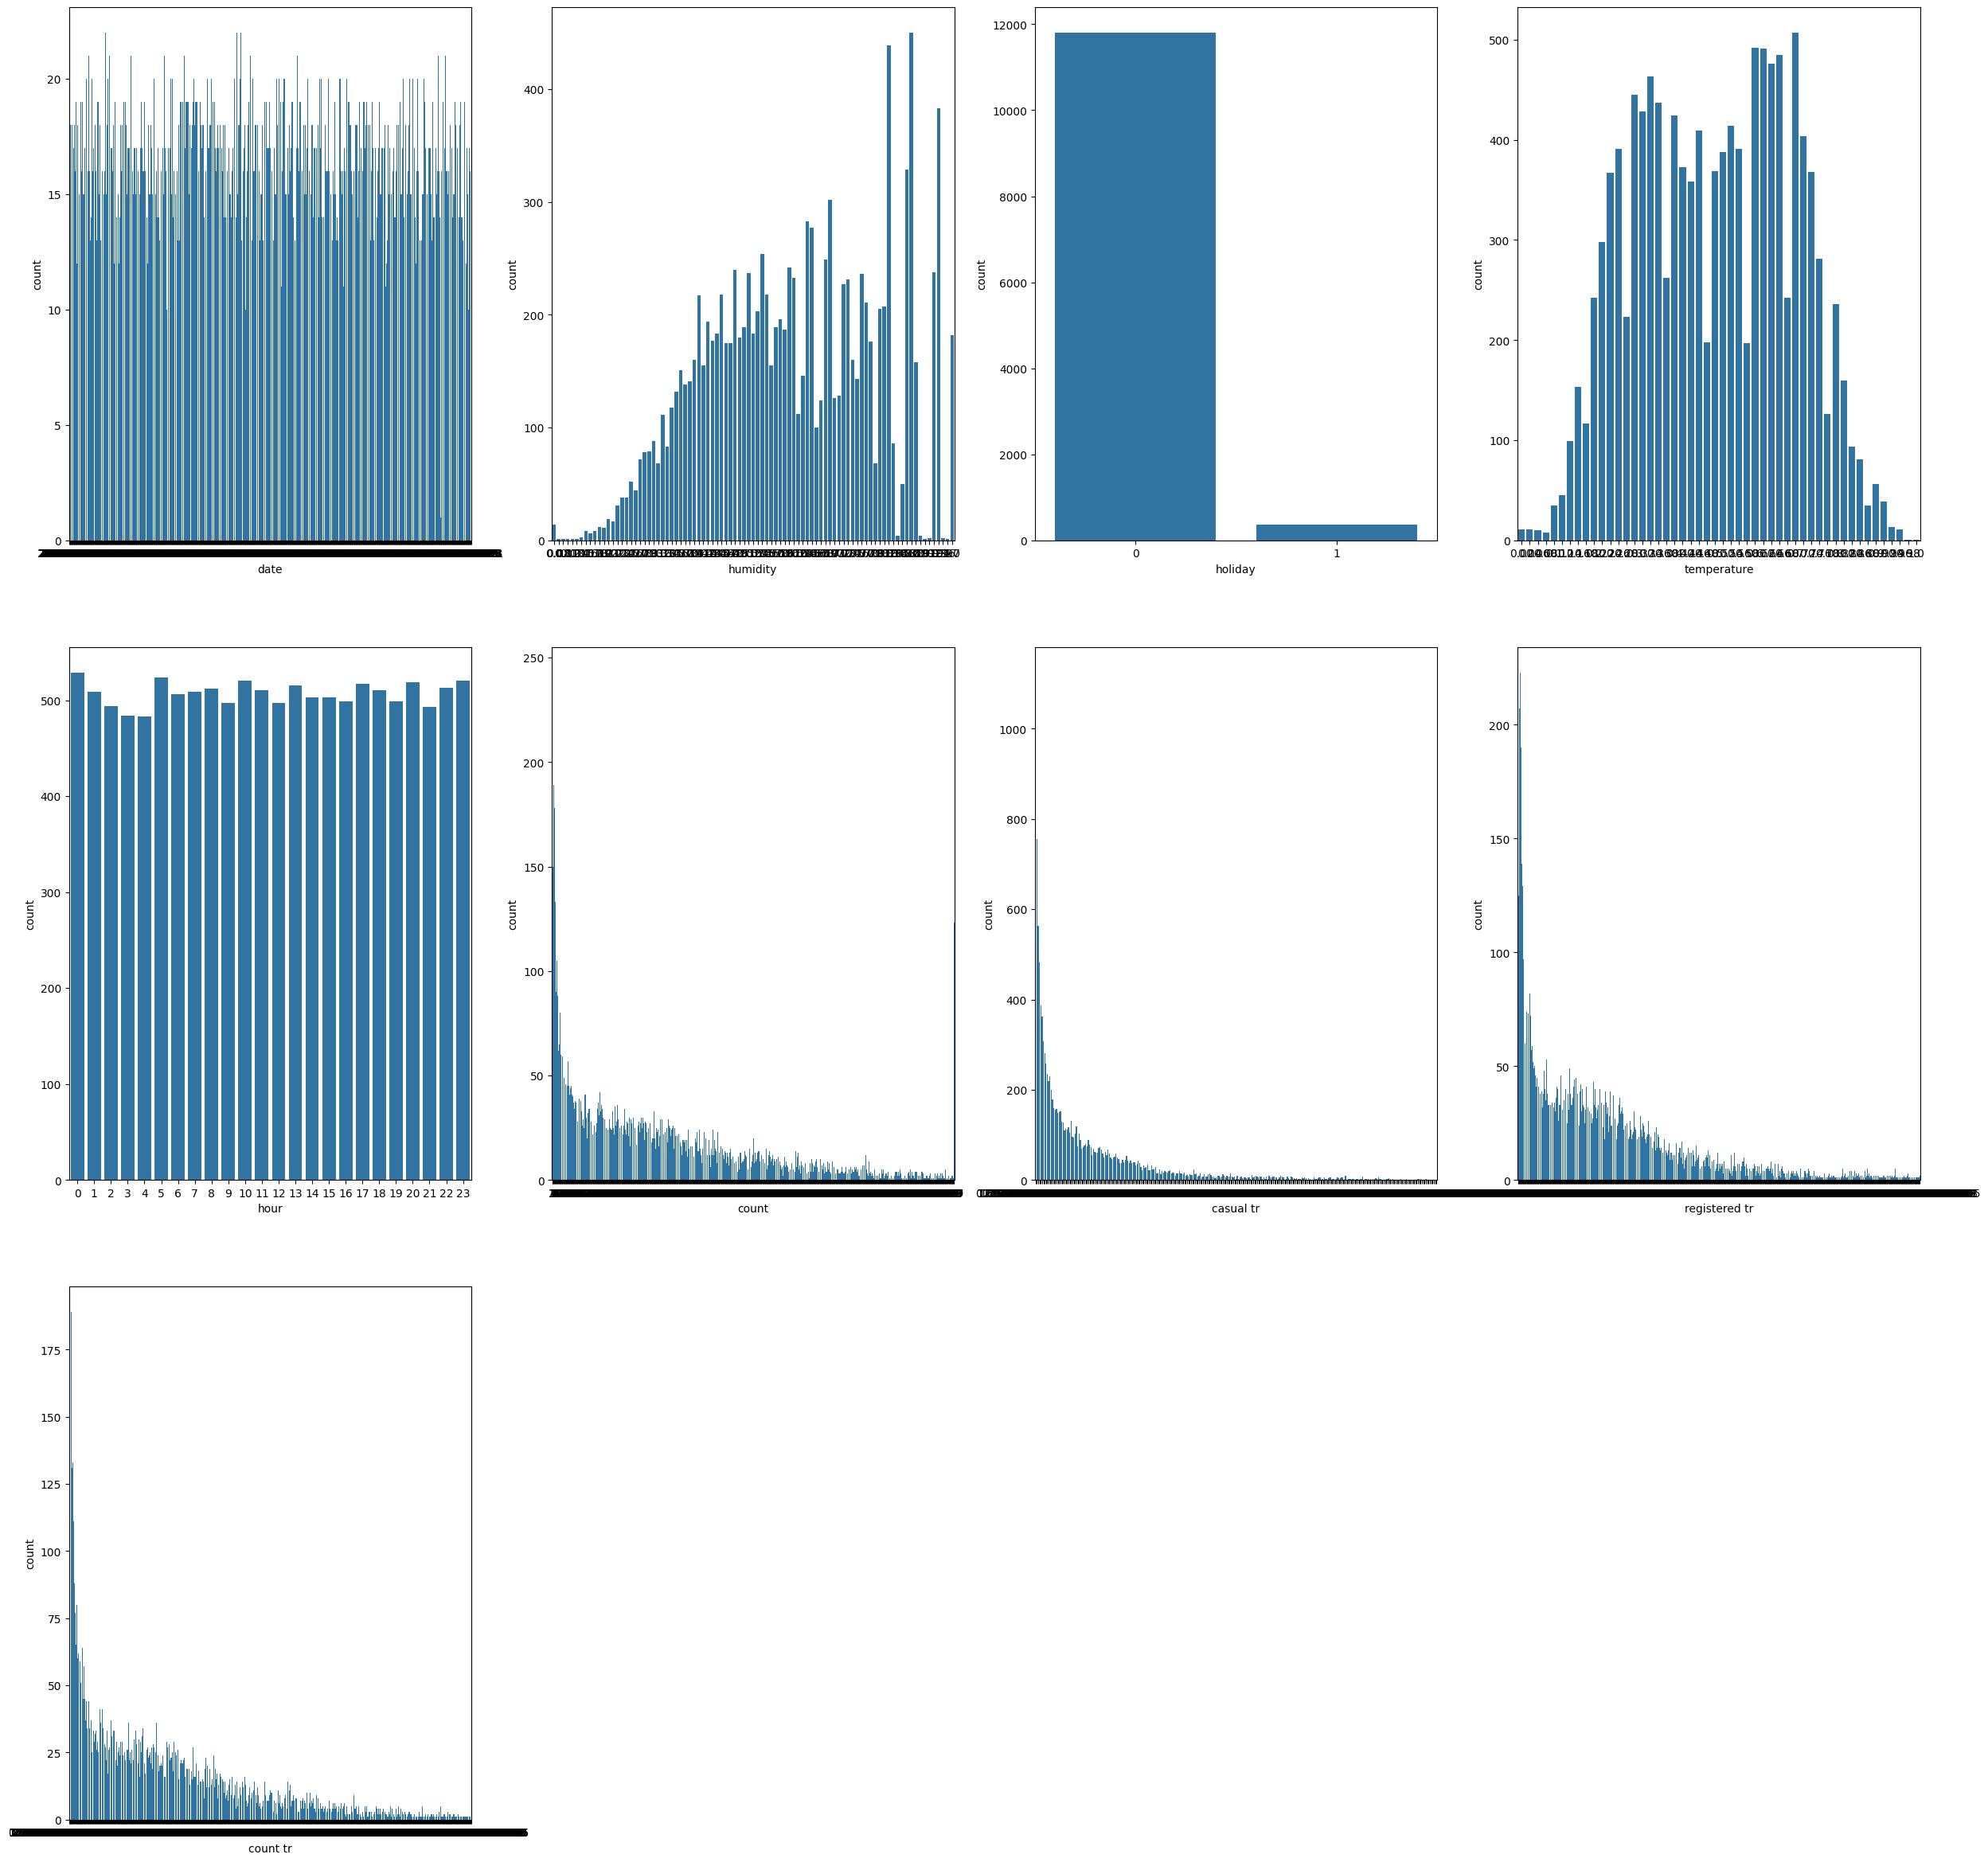

In [23]:
#total of unique values in each column with classification 
plt.figure(figsize=(10,10))
counter=1
plt.figure(figsize=(30,40))
for col in df_bike.columns:
    if col not in ['casual','Temperature','registered','atemp','season', 'weather']:
        print(f"the column {col} has: ",df[col].value_counts())
        plt.subplot(4,4,counter)
        sns.countplot(x=col,data=df)
        sns.color_palette("husl")
        counter+=1
plt.show() 

## **3. Data Preprocessing**

the distribution of column count is: 


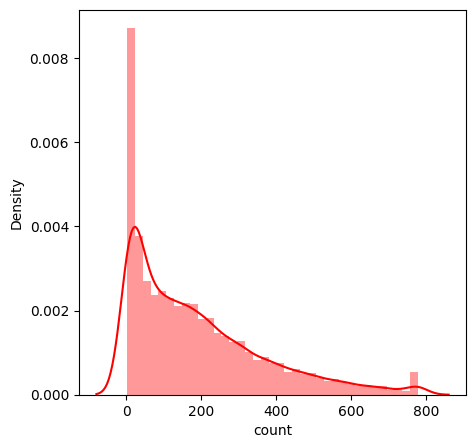

the distribution of column temperature is: 


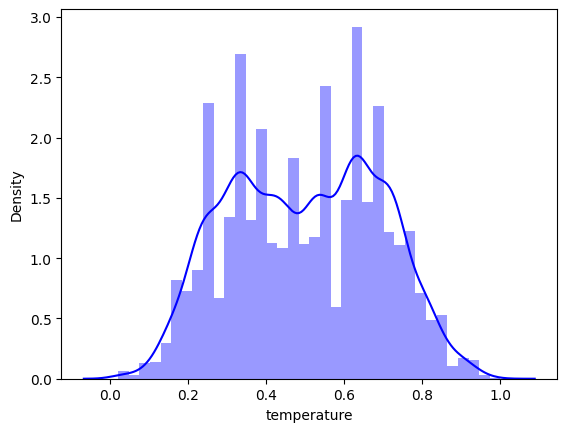

In [24]:
# identify distribution in each column that has a number of values
plt.figure(figsize=(5,5))
for col,color_dist in zip(['count','temperature'],['red','blue']):
    print(f"the distribution of column {col} is: ")
    sns.distplot(df[col],color=color_dist)
    plt.show()

**Interpretation** 

- The distribution of count density is heavily right-skewed, which means the 'count' values are concentrated near the lower end of the range with a long tail extending to the higher values. 
- This distribution suggests that mid-range temperatures are the most common, while extreme temperatures are relatively rare.

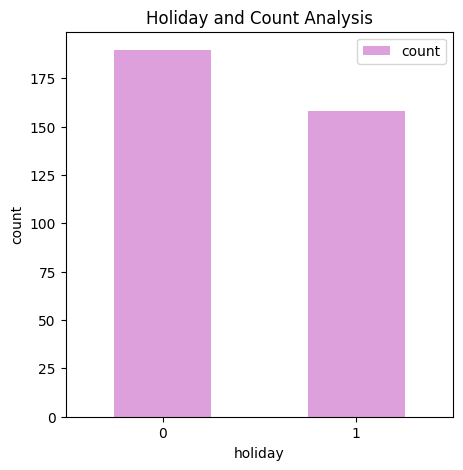

In [85]:

holiday_count = df_bike.pivot_table(index='holiday',values='count',aggfunc=np.mean)
holiday_count.plot(kind='bar',figsize=(5,5), color='plum')
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('Holiday and Count Analysis')
plt.xticks(rotation=0)
plt.show()

**Interpretation**

The holiday (1) count is significantly higher on non-holidays (0), suggesting that the bike sharing is more commonly used on regular working days. This could be assumed from routine, work-related activities that occur more frequently on non-holidays.


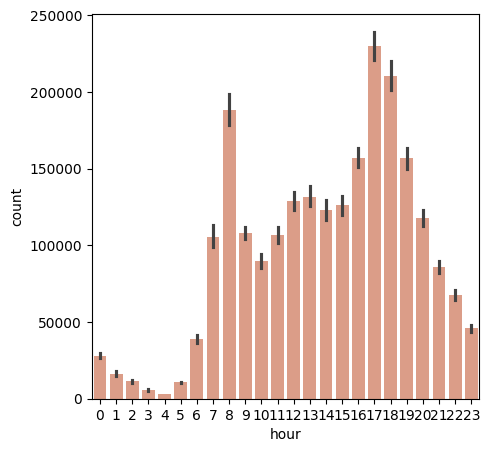

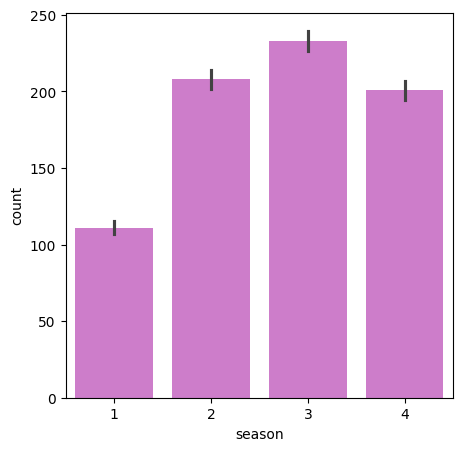

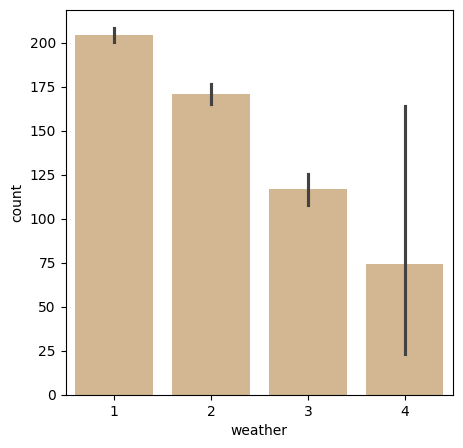

In [86]:

# plot bars of count for hour
plt.figure(figsize=(5,5))
sns.barplot(data=df_bike,x='hour',y='count',estimator=sum, color='darksalmon')
plt.show()
# plot bars of count for season
plt.figure(figsize=(5,5))
sns.barplot(data=df_bike,x='season',y='count', color='orchid')
plt.show()
# plot bars of count for year
plt.figure(figsize=(5,5))
sns.barplot(data=df_bike,x='weather',y='count', color='burlywood')
plt.show()

**Interpretation** 

1. The Bar Graph Hour indicates a bimodal pattern, with peaks in the morning and evening (7.00 -9.00 and 16.00-19.00 hrs), likely reflecting work-related commutes or structured daily routines. It is noteworthy to take into account more resources can be allocated during peak hours to meet demand. 
2. Season 1 has the lowest average count, indicating reduced activity or demand during this season. Season 1 represents winter, which often sees lower outdoor activities or use of bike sharing services. Seasons 2 and 4, correspond to spring and fall, are transitional seasons with variable weather conditions where average count Season 4 is slightly lower than Season 2. Season 3 (Summer) appears to be the highest average count, suggesting peak activity or demand when weather conditions are more favorable for outdoor activities. 
3. Weather condition 1 has the highest average count, indicating that activity or demand is most frequent during this type of weather with clear skies. Weather 4 indicates lowest count as this could represent severe weather conditions like heavy rain, thunderstorm until fog, which drastically reduce activity levels. 


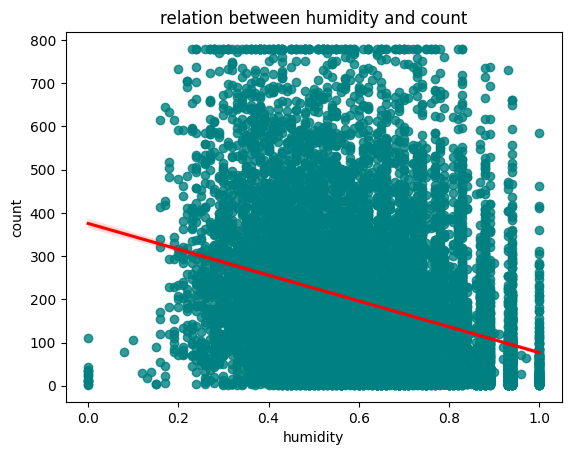

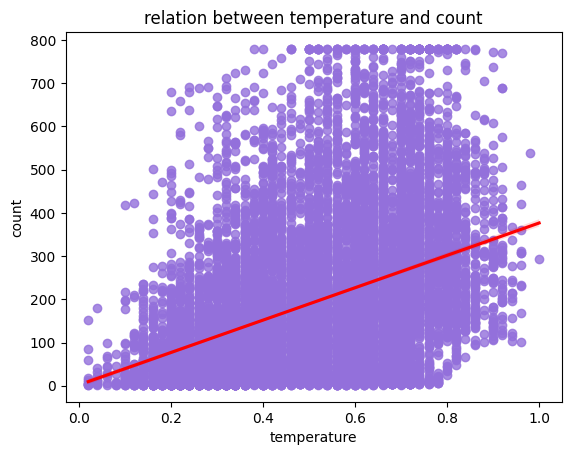

In [30]:
sns.regplot(x=df_bike['humidity'],y=df_bike['count'], color='teal', line_kws=dict(color="red"))
plt.title('relation between humidity and count')
plt.show()
sns.regplot(x=df_bike['temperature'],y=df_bike['count'], color='mediumpurple', line_kws=dict(color="red"))
plt.title('relation between temperature and count')
plt.show()

**Interpretation**

1. relation between humidity and count 
    
    As humidity increases, people may feel less comfortable engaging in outdoor activities, resulting in fewer rentals counts. Nonetheless, the wide spread of points indicates that while humidity has an effect, the temperature also significantly influences activity levels.

2. relation between temperature and count

    Warmer temperatures encourage more outdoor activities, leading to higher counts, while extreme temperatures near (close to 1.0) might show diminishing returns or increased variability as some people may avoid outdoor activities in overly hot conditions.

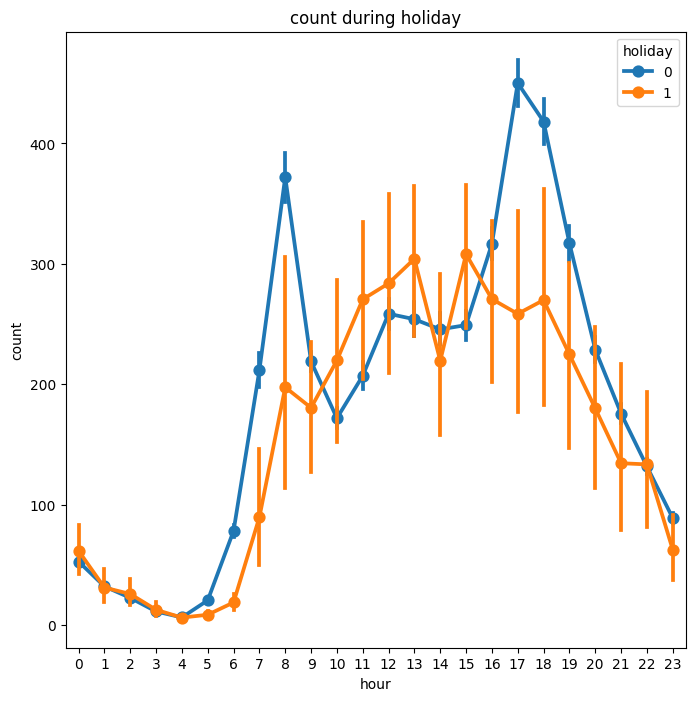

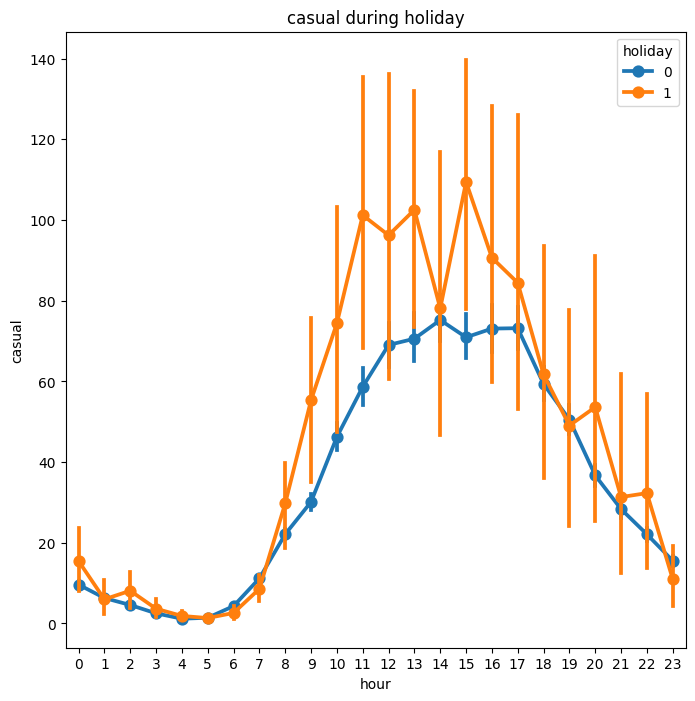

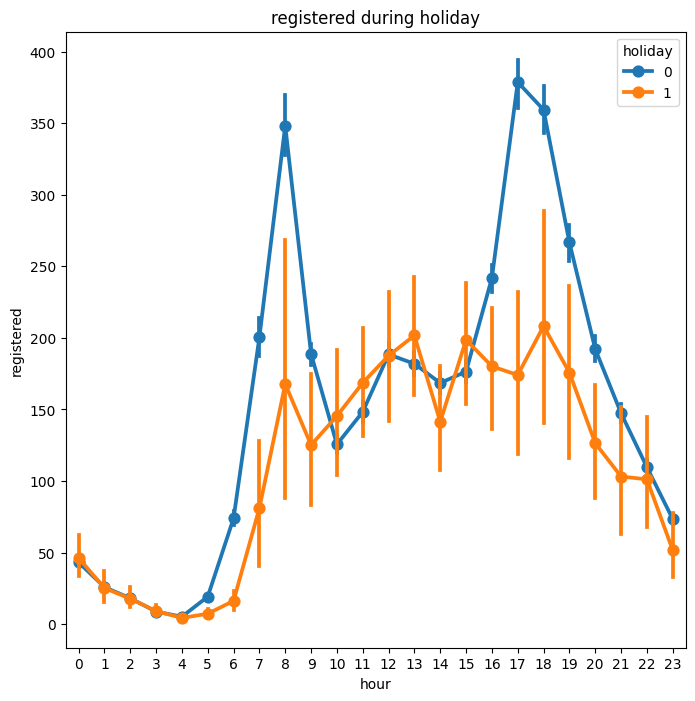

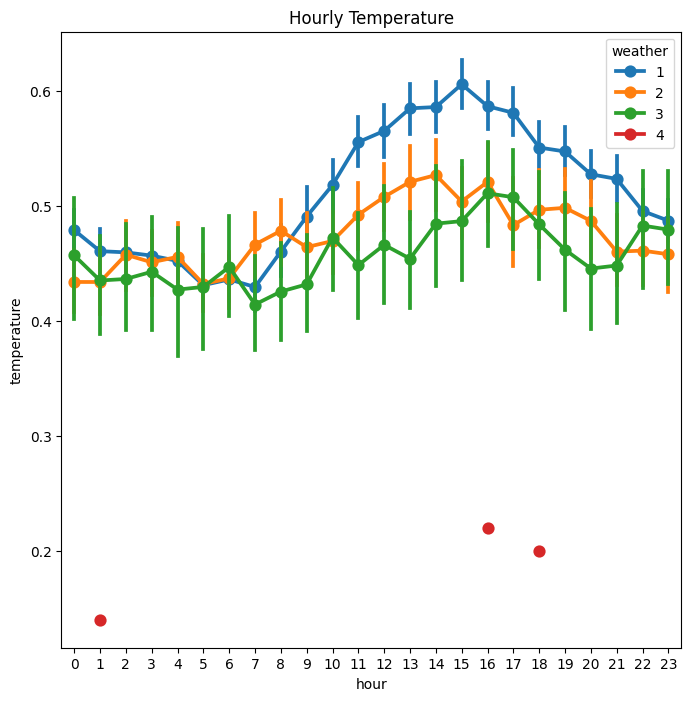

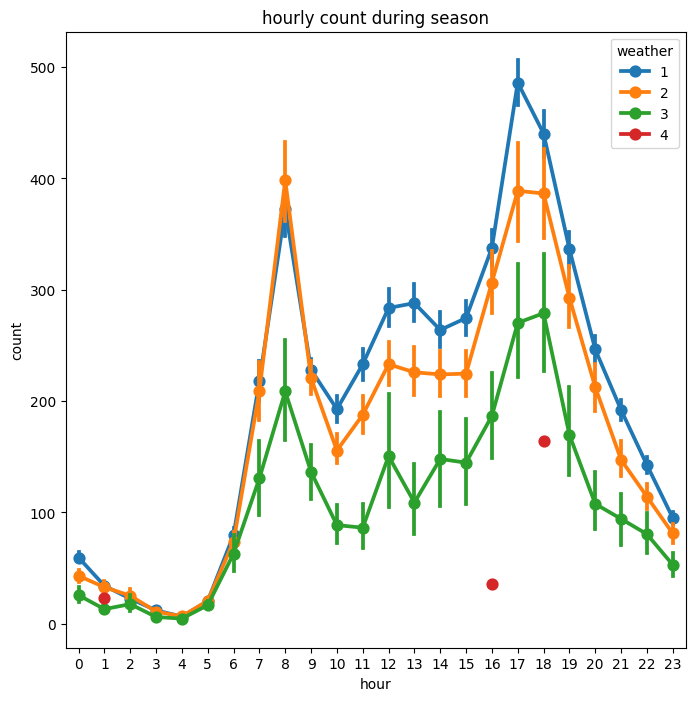

In [42]:
#lineplot count during weekends and weekdays
plt.figure(figsize=(8,8))
sns.pointplot(data=df_bike, x='hour', y='count', hue='holiday')
plt.title('count during holiday')
plt.show()

#lineplot casual during weekends and weekdays
plt.figure(figsize=(8,8))
sns.pointplot(data=df_bike, x='hour', y='casual', hue='holiday')
plt.title('casual during holiday')
plt.show()

#lineplot registered during weekends and weekdays
plt.figure(figsize=(8,8))
sns.pointplot(data=df_bike, x='hour', y='registered', hue='holiday')
plt.title('registered during holiday')
plt.show()

#lineplot count during weather
plt.figure(figsize=(8,8))
sns.pointplot(data=df_bike, x='hour', y='temperature', hue='weather')
plt.title('Hourly Temperature')
plt.show()

#lineplot count during season
plt.figure(figsize=(8,8))
sns.pointplot(data=df_bike, x='hour', y='count', hue='weather')
plt.title('hourly count during season')
plt.show()

**Interpretation**

1.   count during holiday 
     
     The bike use pattern is spread more evenly throughout the day during holidays, with activity concentrated in midday hours instead of sharp peaks. Unlike activity during non-holidays is highly concentrated during commuting hours (morning and evening rush).

2.   casual during holiday 
     
     a. The number of casual users steadily increases during the morning, and significantly during midday. 
     
     b. Casual Users activity starts earlier and rises more in the morning compared to non-holidays. This can be triggered when Casual Users are most prominent during midday hours 
          (10.00 to 14.00 hrs), aligning with when they typically engage in leisure activities.

3.   registered during holiday 

     a. Registered Users demonstrate a clear commuting behavior on non-holidays, with sharp activity peaks in the morning and evening.
     
     b. Registered Users do not follow commuting patterns. Instead, their activity is more evenly spread throughout the day, aligning with leisure or other non-work-related activities.

4.   Hourly Temperature 

     a. Weather 1 appears to be a favorable weather that correlates with warmer temperatures throughout the day, peaking during midday hours. 
     
     b. Weather 4 is associated with the lowest and most variable temperatures. 

5.   hourly count during season 

     This lineplot shows the strong influence of weather on hourly use patterns. It also highlights that favorable weather optimizes activity and sustains predictable patterns, while unfavorable weather disrupts or diminishes activity significantly. 

In [32]:
#time series to adjust "DATE" to enable the variables read in heatmap 
df_bike['date'] = pd.to_datetime(df_bike['date'])
df_bike['date'].sort_values(ascending=True)

2514    2011-01-01
9022    2011-01-01
8580    2011-01-01
8585    2011-01-01
450     2011-01-01
           ...    
6367    2012-12-31
9312    2012-12-31
10693   2012-12-31
6114    2012-12-31
965     2012-12-31
Name: date, Length: 12165, dtype: datetime64[ns]

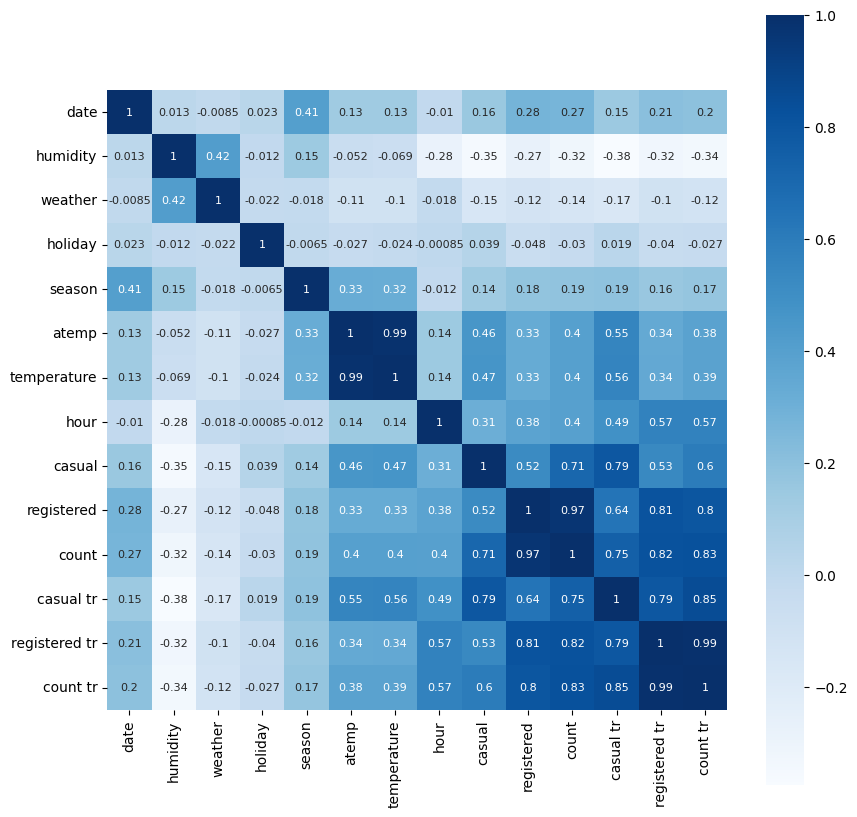

In [33]:
#FIND CORRELATION VALUES IN DATASET 
correlation = df_bike.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show() 

The heatmap above reveals the following: 
1. **Strong Positive Correlations**

    a. The total count is primarily driven by Registered Users that form the bulk of total activity.

    b. Casual Users have weaker influence on the total count compared to Registered Users.

    c. People are more active during moderate or warm weather.

2. **Moderate/Weak Negative Correlations**

    a. High humidity appears to deter activity, likely due to discomfort.

    b. Poor weather (eg, rain or storms) relatively reduces activity despite the impact is rather mild.

Though the reveals may be reasoned by some factors, we will take a deep dive how each variable (users intensity, environment and time trends) may bring influence to our predictive modelling. 
1. **correlation between casual vs. registered**

    Casual and Registered users are somewhat aligned but not entirely. They both may gradually increase during certain times of day. However, there can also be situations where Registered Users are more active than Casual Users.

2. **Environmental Aspects**
    
    Variables temperature and atemp are nearly identical. Warmer days likely favor more outdoor activity. On the other hand, higher humidity reduces users activity for all types, with casual users more affected.

3. **Time-Related Variables**
    
    Registered Users may exhibit stronger time-based patterns while Casual Users may show less dependency on time, reflecting more leisure-based bike-sharing use. 

In [34]:
cols = ['season','hour','holiday','weather']
for col in cols:
    df_bike[col] = df_bike[col].astype('category')

In [35]:
df.head()
df_ohe = df
df_ohe.head()

def one_hot_encoder(data,column):
    data = pd.concat([data,pd.get_dummies(df[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop(columns = [column],axis=1)
    return data
for col in cols:
    bike_dataset_oh = one_hot_encoder(df_ohe,col)

As our model prediction will be narrowing to Linear Regression and Decision Tree, it is advisable to use One Hot Encoder (OHE) for numerical input. OHE is among methods to represent categories numerically (such as variables defined in **cols** above). Otherwise, our models may interpret the variables in ordinal for which we do not aim in this Analysis. In other words, OHE treats these variables equally as independent variables. To ensure that both training and test sets have the same data format and transformations applied we are using variables we have trasnformed previously, ie 'casual tr', 'registered tr', and 'count tr' since using untransformed variables may risk producing inconsistent results in our prediction. 

In [36]:
df_ohe.head()

,date,humidity,weather,holiday,season,atemp,temperature,hour,casual,registered,count,casual tr,registered tr,count tr
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,3.218876,5.424950,5.525453
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,1.098612,2.833213,2.944439
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2.890372,4.510860,4.682131
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2.995732,4.844187,4.983607
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,696,779,4.605170,6.632002,6.754604


## **3.1 Data Splitting**

In [45]:
#splitting data into input and label data
X = df_ohe.drop(columns=['date','atemp','casual','registered','count'],axis=1)
Y = bike_dataset_oh['count tr']

We are dropping unnecessary variables including untransformed variables ('casual', 'registered', 'count') and variables like 'atemp' as its redundancy with 'temp' variables. We are of thought to decide they will not be necessary for our model preparation. Consequently, we are selecting 'count tr' as the Target Variable (Y) to represent the label in our machine learning to predict. 

In [50]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(12165, 10) (8515, 10) (3650, 10)
(12165,) (8515,) (3650,)


**Interpretation** 

A. **Input Features** 

    1. (12165, 10) means full dataset with total of 12,165 rows and 10 features. 
    2. (8515, 10) means total 8,515 rows and 10 features representing 70% of the data. 
    3. (3650, 10) means total of 3,650 rows 10 features representing 30% 

B. **Target Variable**

    1. 12165 means the total target values. 
    2. 8515 represents the target values for training from 70% of the data.
    3. 3650 represents the target values for testing from 30% of the data. 

## **3.2 Data Training**

In [55]:
def plot_train_test(y_train, predicted_y_train, y_test, predicted_y_test):
    # Training data plot
    plt.figure(figsize=(7, 7))
    plt.scatter(y_train, predicted_y_train, color='red', marker='X', label='Train Data')
    plt.plot(
        [min(y_train), max(y_train)],
        [min(y_train), max(y_train)],
        color='darkmagenta',
        linestyle='--',
        label='Perfect Prediction'
    )
    plt.title('Actual vs Predicted - Training Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    # Testing data plot
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, predicted_y_test, color='blue', marker='o', label='Test Data')
    plt.plot(
        [min(y_test), max(y_test)],
        [min(y_test), max(y_test)],
        color='mediumblue',
        linestyle='--',
        label='Perfect Prediction'
    )
    plt.title('Actual vs Predicted - Testing Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

In [56]:
# Train and test model
def Train_predict(model,x_train,x_test,y_train,y_test):
    
    model.fit(x_train,y_train)
    predicted_train_data = model.predict(x_train)
    predicted_test_data = model.predict(x_test)
    plot_train_test(y_train,predicted_train_data,y_test,predicted_test_data)
    accuracy_train_pred = r2_score(y_train,predicted_train_data)
    accuracy_test_pred = r2_score(y_test,predicted_test_data)
    return [accuracy_train_pred,accuracy_test_pred]

the model: LinearRegression() :


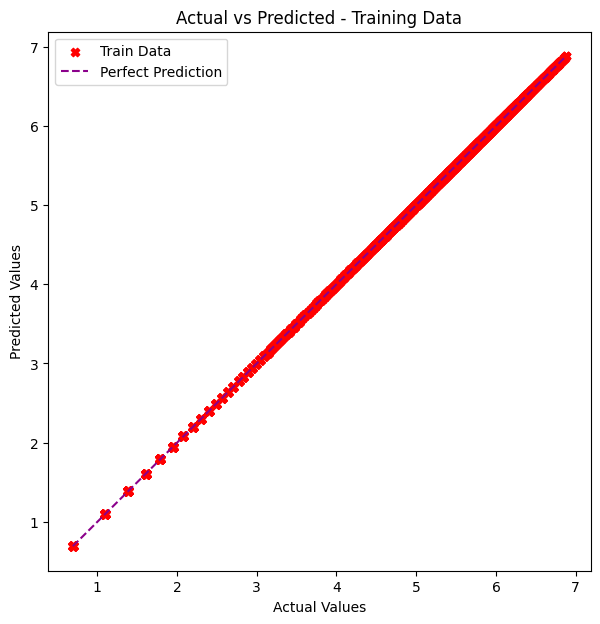

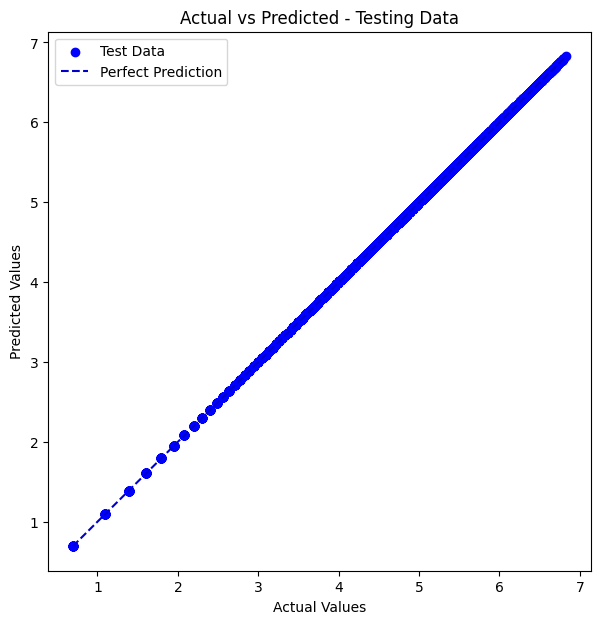

and has 1.0 on train data and 1.0 on test data



the model: DecisionTreeRegressor() :


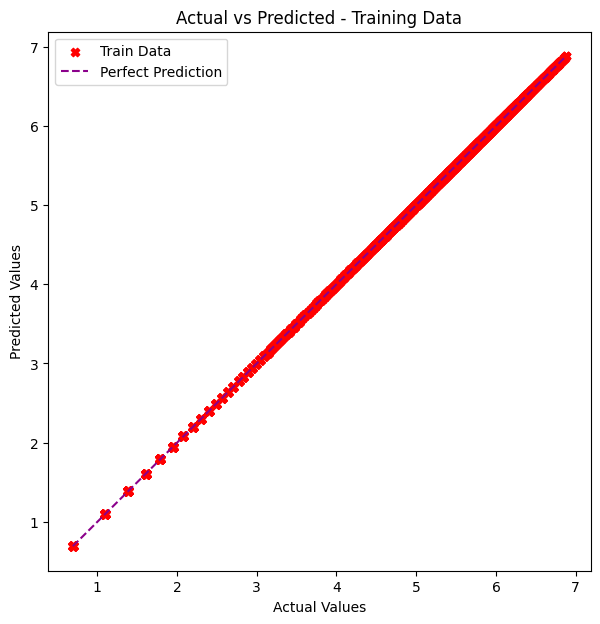

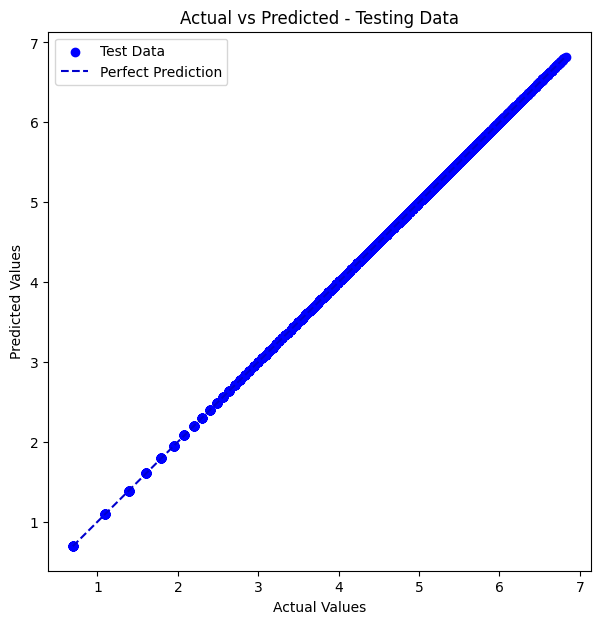

and has 1.0 on train data and 0.9999998475979822 on test data



the model: RandomForestRegressor() :


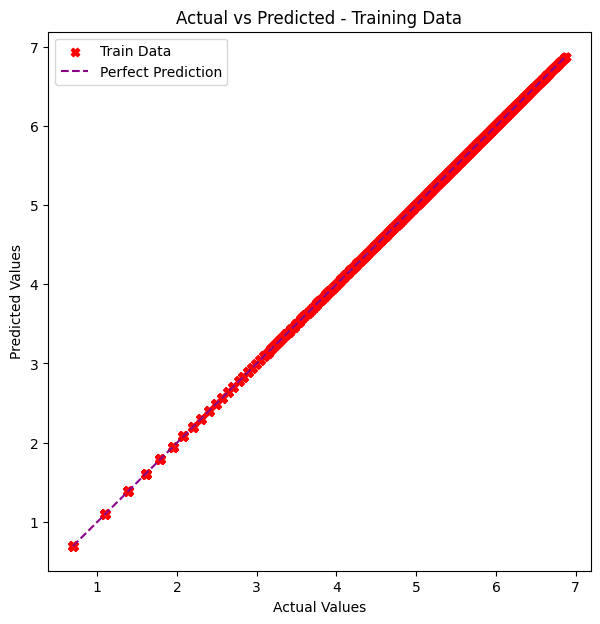

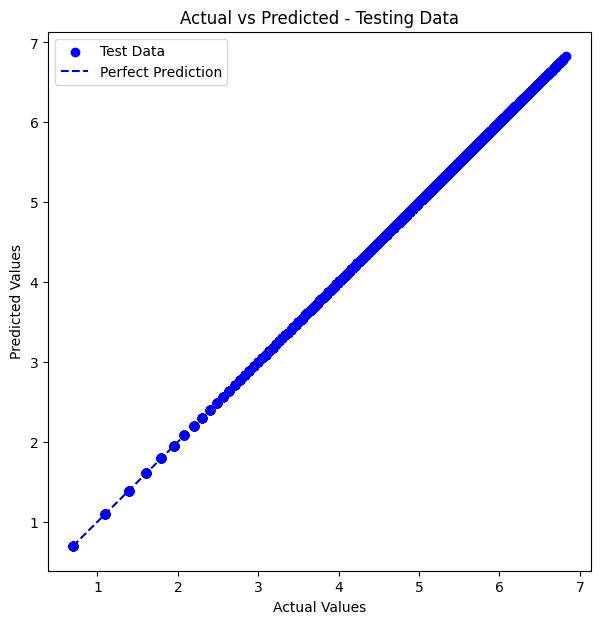

and has 0.9999999866605666 on train data and 0.9999999597903283 on test data



the model: Ridge() :


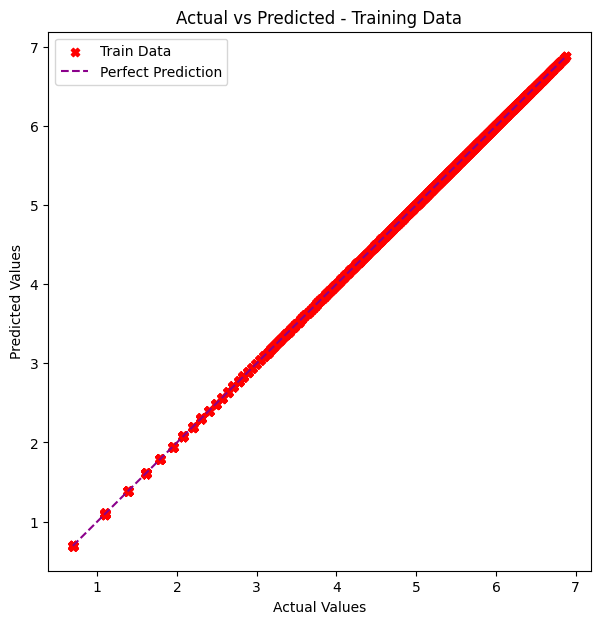

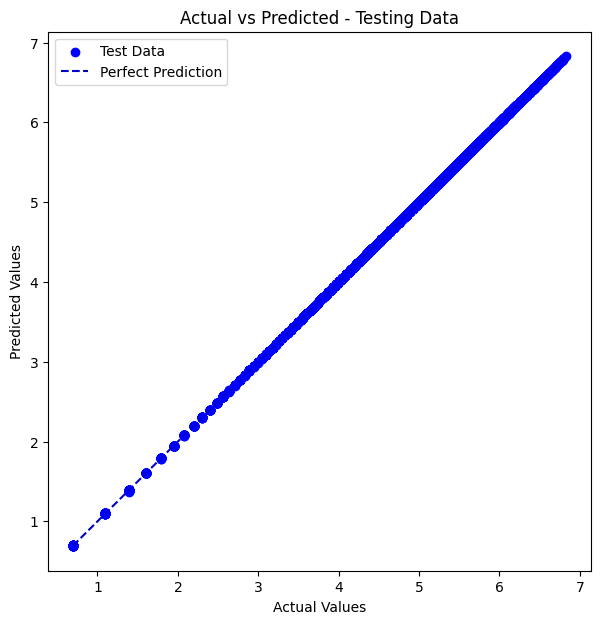

and has 0.9999989866663519 on train data and 0.9999989426066357 on test data



the model: GradientBoostingRegressor() :


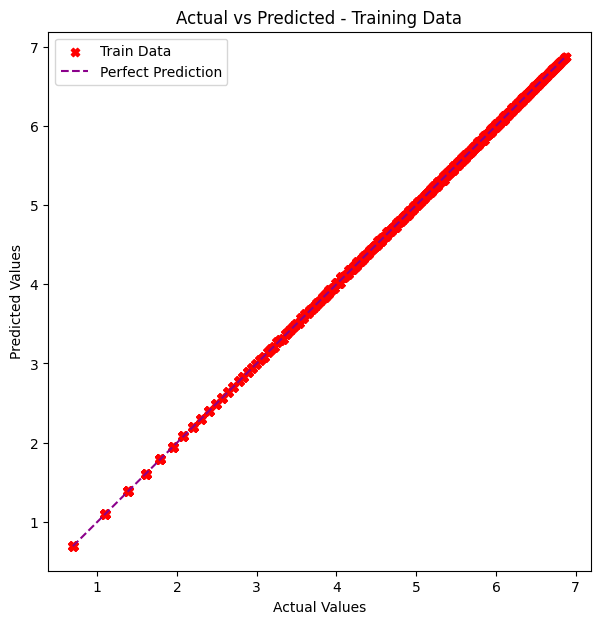

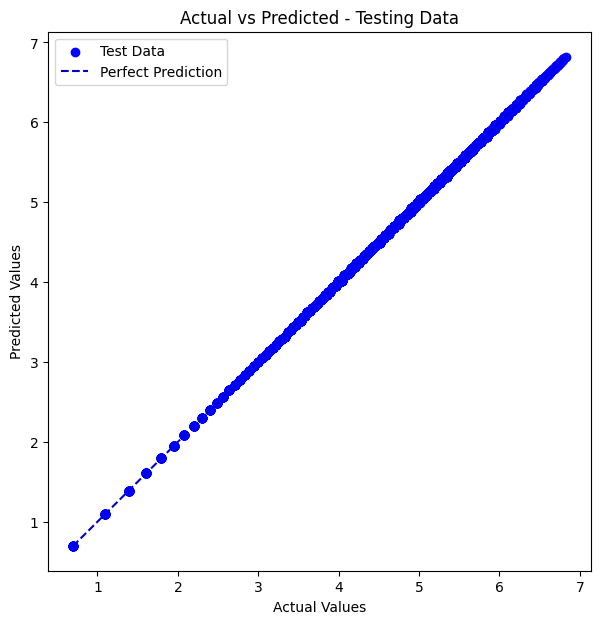

and has 0.9999623899349884 on train data and 0.9999626922693962 on test data





In [61]:
from sklearn.metrics import r2_score, mean_absolute_error
Models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Ridge(),
    GradientBoostingRegressor()
]
df_ohe['humidity'] = pd.to_numeric(df_ohe['humidity'], errors='coerce') #ini untuk mengubah data float supaya dapat digunakan dalam metode perhitungan prediksi menjadi numerik
for model in Models: 
    print("the model:",model,":")
    accuracy_train_pred, accuracy_test_pred = Train_predict(model,x_train,x_test,y_train,y_test)
    print("and has",accuracy_train_pred,"on train data and",accuracy_test_pred,"on test data\n\n\n")

**Interpretation** 

1. The Linear Regression indicates solid prediction by the model for the dataset as the score reaches 1.0 on train data and 99% on test data. 
2. Decision Tree shares the same indication with the Linear Regression as the result indicates fit prediction with score 1.0 on train data and 99% on test data. 
3. Random Forest similarly produces fit prediction test score up to 99% equals to its train data. Although we are relatively confident to infer this condition from data processing above which is more lenient for Random Forest. 
4. Ridge model reveals linear relationship between train data and test data as it scores 99% in both. 
5. Gradient Boosting also shows fit performance both train and test set. 

Nonetheless, we need to ensure if the above models really perform according to their nearly fit model prediction by verifying if there is any overlap indicating any overfitting or underfitting and metrics properiety. 

Below reveals there is no overlap between train and test data. However, as we take further dive into multicollinearity check, we find that the Variance Inflation Factor (VIF) concludes the data set has significant multicollinearity issue as evidenced from variables 'casual tr', 'registered tr', and 'count tr' (all of which have been transformed). This arises during Ridge model testing suggesting high VIF score where some features are highly correlated with others. We do not expect this to happen as this multicollinearity can bring negative impact to our model performance. What we are going to do is to take : 

a. regularization to our Ridge model coupled with Lasso; 

b. drop some features contributing to multicollinearity; and

c. reperforming our model with Gridsearch as alternative for its versatile use in both Regression and Classification. 


In [59]:
overlap = set(x_train.index) & set(x_test.index)
print(f"Overlap between train and test data: {len(overlap)} rows")

Overlap between train and test data: 0 rows


In [60]:
print(f"Train data shape: {x_train.shape}, Test data shape: {x_test.shape}")
assert set(x_train.index).isdisjoint(set(x_test.index)), "Train and Test data overlap!"

Train data shape: (8515, 10), Test data shape: (3650, 10)


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = x_train.columns
vif_data['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif_data)

         Feature          VIF
0  humidity       inf        
1  weather        7.432086   
2  holiday        1.046139   
3  season         7.058824   
4  temperature    11.821422  
5  hour           5.799697   
6  casual tr      41.711247  
7  registered tr  1876.813853
8  count tr       2460.058992
9  Humidity       inf        


In [63]:
from sklearn.linear_model import Ridge, LassoCV

# Ridge
ridge = Ridge(alpha=1.0).fit(x_train, y_train)
print(ridge.coef_)

# Lasso
lasso = LassoCV(cv=5).fit(x_train, y_train)
print(lasso.coef_)

[ 3.32963719e-04 -2.60579686e-05  5.29156802e-04 -7.68460993e-05
 -9.41549720e-04 -2.49112536e-05  3.06187760e-03  1.55453985e-02
  9.82157268e-01  3.32963718e-04]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.99544235e-04  0.00000000e+00  1.46129217e-03
  9.94978747e-01 -0.00000000e+00]


In [65]:
drop_features = ['casual tr', 'registered tr', 'count tr']  # Replace with actual names
X_reduced = X.drop(columns=drop_features)

In [67]:
vif_data2 = pd.DataFrame()
vif_data2['Feature'] = X_reduced.columns
vif_data2['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print(vif_data2)

       Feature       VIF
0  humidity     inf     
1  weather      7.136100
2  holiday      1.028375
3  season       6.742138
4  temperature  7.430693
5  hour         3.453987
6  Humidity     inf     


In [68]:
x_train, x_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.3, random_state=42, shuffle=True)

In [69]:
ridge_model = Ridge(alpha=0.5)  
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.5)

As we initially found heavy multicollinearity, we are taking further metrics evaluation using MAE and RMSE to measure how well our regression model runs prediction towards our target variable compared to actual value. We decide that these measures are comparable to Ridge models which reveals most issues in multicollinearity. 

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

#performing our models
print("R² on Training Data:", r2_score(y_train, y_train_pred))
print("R² on Testing Data:", r2_score(y_test, y_test_pred))
print("MAE on Testing Data:", mean_absolute_error(y_test, y_test_pred))
print("RMSE on Testing Data:", mean_squared_error(y_test, y_test_pred, squared=False))

R² on Training Data: 0.4613228962109944
R² on Testing Data: 0.45828163827059576
MAE on Testing Data: 0.8214401476082447
RMSE on Testing Data: 1.0369045508560222


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)
print("Best Alpha:", grid.best_params_['alpha'])

Best Alpha: 0.1


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [73]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

# Evaluate
y_test_pred_gb = gb_model.predict(x_test)
print("R² on Testing Data (GB):", r2_score(y_test, y_test_pred_gb))

R² on Testing Data (GB): 0.8074417781064194


In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


Following copious recourses to remodel our machine learning, we have reached to indicating progressive model prediction favoring our goals where: 

1. lower learning rate (0.5) and max depth of trees up to 5 limit our model complexity to prevent overfitting. 
2. sub-sample of up to 80% suggest randomness and our model effort to reduce overfitting while maintaining its performance. 

# **4. Conclusions**

1. Among 5 models run, Model GradientBoosting has contributed most to model prediction improvement in the dataset with MAE 4.5% and MAPE 26.82%, making it moderately fit for model performance. As the time running is relatively less than 1 minute to take for 12.165 rows. 

2. Variables 'casual', 'registered' and 'count' appear to have significantly provide pivotal estimation to our model than other variables, like humidity, temperature, holiday and weather, suggesting supporting variables for model prediction. 

3. Nonetheless, each model needs further tuning to ensure no overfitting or underfitting that might affect model performance. Despite the MAE and MAPE scores reveal the model does not appear even to near perfection, GradientBoosting (even the most favorable model in this Analysis) still needs improving with careful tuning. 


# **5. Recommendations**

1. Bike Sharing Awareness: 
    
    a. Bad weather may influence people to not use bike-sharing as it follows with decrease of use. Though weather is inevitable to predict, we can opt to maintain bike sharing availability during peak hours where bikes are easily accessible to people during holiday and peak hours. 
    
    b. Additional facilities for bike maintenance in accessible spots may be assistive for users in distress, especially during bad weather. 

2. Machine Learning Model: 
    Linear Regression and Decision Tree may be more rigid compared to GradientBoosting, as they need further tuning to ensure the model fit properly. It is rather not advisable to only use Linear Regression nor Decision Tree without other models for comparison. 
   

# **6. Model Saving**

In [78]:
import pickle

estimator = grid_search.best_estimator_
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('BikeSharing-KateDethan.sav', 'wb'))

In [81]:
file = 'BikeSharing-KateDethan.sav'
final_model = pickle.load(open(file, 'rb'))

In [82]:
mean_absolute_error(y_test, final_model.predict(x_test))

np.float64(0.4597153551880236)

In [83]:
print("Mean of Target Variable:", y_test.mean())

Mean of Target Variable: 4.559317418178771


In [84]:
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("MAPE:", mape, "%")

MAPE: 26.820411203937493 %
